<img src="../../images/qiskit-heading.gif" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="500 px\" align="left">

# Quantum Volume Overview

### Contributors

Shelly Garion$^{1}$ and David McKay$^{2}$

1. IBM Research Haifa, Haifa University Campus, Mount Carmel Haifa, Israel
2. IBM T.J. Watson Research Center, Yorktown Heights, NY, USA

## Introduction

**Quantum Volume (QV)** is a single-number metric that can be measured using a concrete
protocol on near-term quantum computers of modest size. The QV method quantifies
the largest random circuit of equal width and depth that the computer successfully implements.
Quantum computing systems with high-fidelity operations, high connectivity, large calibrated gate
sets, and circuit rewriting toolchains are expected to have higher quantum volumes. 


### References

[1] Andrew W. Cross, Lev S. Bishop, Sarah Sheldon, Paul D. Nation, and Jay M. Gambetta, *Validating quantum computers using randomized model circuits*, https://arxiv.org/pdf/1811.12926



## The Quantum Volume Protocol

A QV protocol (see [1]) consists of the following steps:

(We should first import the relevant qiskit classes for the demonstration).

In [1]:
#Import general libraries (needed for functions)
import numpy as np
import matplotlib.pyplot as plt
from IPython import display

#Import Qiskit classes classes
import qiskit
from qiskit.providers.aer.noise import NoiseModel
from qiskit.providers.aer.noise.errors.standard_errors import depolarizing_error, thermal_relaxation_error

#Import the qv function.
import qiskit.ignis.verification.quantum_volume as qv

### Step 1: Generate QV sequences

It is well-known that quantum algorithms can be expressed as polynomial-sized quantum circuits built from two-qubit unitary gates. Therefore, a model circuit consists of $d$ layers of random permutations of the qubit labels, followed by random two-qubit gates (from $SU(4)$). When the circuit width $m$ is odd, one of the qubits is idle in each layer.

More precisely, a **QV circuit** with **depth $d$** and **width $m$**, is a sequence $U = U^{(d)}...U^{(2)}U^{(1)}$ of $d$ layers:
$$ U^{(t)} = U^{(t)}_{\pi_t(m'-1),\pi_t(m)} \otimes ... \otimes U^{(t)}_{\pi_t(1),\pi_t(2)} $$
each labeled by times $t = 1 ... d$ and acting on $m' = 2 \lfloor n/2 \rfloor$ qubits. 
Each layer is specified by choosing a uniformly random permutation $\pi_t \in S_m$ of the $m$ qubit indices
and sampling each $U^{(t)}_{a,b}$, acting on qubits $a$ and $b$, from the Haar measure on $SU(4)$.

In the following example we have 6 qubits Q0,Q1,Q3,Q5,Q7,Q10. We are going to look at subsets up to the full set
(each volume circuit will be depth equal to the number of qubits in the subset)

In [2]:
# qubit_lists: list of list of qubit subsets to generate QV circuits
qubit_lists = [[0,1,3],[0,1,3,5],[0,1,3,5,7],[0,1,3,5,7,10]]
# ntrials: Number of random circuits to create for each subset
ntrials = 50

We generate the quantum volume sequences. We start with a small example (so it doesn't take too long to run).

In [3]:
qv_circs, qv_circs_nomeas = qv.qv_circuits(qubit_lists, ntrials)

As an example, we print the circuit corresponding to the first QV sequence. Note that the ideal circuits are run on the first n qubits (where n is the number of qubits in the subset).

In [4]:
#pass the first trial of the nomeas through the transpiler to illustrate the circuit
qv_circs_nomeas[0] = qiskit.compiler.transpile(qv_circs_nomeas[0], basis_gates=['u1','u2','u3','cx'])

In [5]:
print(qv_circs_nomeas[0][0])

          ┌────────────────────────────┐┌───┐┌───────────────────────────┐┌───┐»
qr_0: |0>─┤ U3(1.1386,-2.7814,0.31562) ├┤ X ├┤ U3(0.38764,1.5708,3.1416) ├┤ X ├»
         ┌┴────────────────────────────┤└─┬─┘└───────────────────────────┘└─┬─┘»
qr_1: |0>┤ U3(1.8911,-2.9647,-0.71611) ├──┼─────────────────────────────────┼──»
         └┬────────────────────────────┤  │    ┌───────────────────────┐    │  »
qr_2: |0>─┤ U3(1.2934,-0.31722,1.2092) ├──■────┤ U3(0.44878,-3.1416,0) ├────■──»
          └────────────────────────────┘       └───────────────────────┘       »
 cr_0: 0 ══════════════════════════════════════════════════════════════════════»
                                                                               »
 cr_1: 0 ══════════════════════════════════════════════════════════════════════»
                                                                               »
 cr_2: 0 ══════════════════════════════════════════════════════════════════════»
                            

### Step 2: Simulate the ideal QV circuits

The quantum volume method requires that we know the ideal output for each circuit, so we use the statevector simulator in Aer to get the ideal result.

In [6]:
#The Unitary is an identity (with a global phase)
backend = qiskit.Aer.get_backend('statevector_simulator')
ideal_results = []
for trial in range(ntrials):
    print('Simulating trial %d'%trial)
    ideal_results.append(qiskit.execute(qv_circs_nomeas[trial], backend=backend).result())


Simulating trial 0
Simulating trial 1
Simulating trial 2
Simulating trial 3
Simulating trial 4
Simulating trial 5
Simulating trial 6
Simulating trial 7
Simulating trial 8
Simulating trial 9
Simulating trial 10
Simulating trial 11
Simulating trial 12
Simulating trial 13
Simulating trial 14
Simulating trial 15
Simulating trial 16
Simulating trial 17
Simulating trial 18
Simulating trial 19
Simulating trial 20
Simulating trial 21
Simulating trial 22
Simulating trial 23
Simulating trial 24
Simulating trial 25
Simulating trial 26
Simulating trial 27
Simulating trial 28
Simulating trial 29
Simulating trial 30
Simulating trial 31
Simulating trial 32
Simulating trial 33
Simulating trial 34
Simulating trial 35
Simulating trial 36
Simulating trial 37
Simulating trial 38
Simulating trial 39
Simulating trial 40
Simulating trial 41
Simulating trial 42
Simulating trial 43
Simulating trial 44
Simulating trial 45
Simulating trial 46
Simulating trial 47
Simulating trial 48
Simulating trial 49


Next, we load the ideal results into a quantum volume fitter

In [7]:
qv_fitter = qv.QVFitter(qubit_lists=qubit_lists)
qv_fitter.add_statevectors(ideal_results)

### Step 3: Calculate the heavy outputs

To define when a model circuit $U$ has been successfully implemented in practice, we use the *heavy output* generation problem. The ideal output distribution is $p_U(x) = |\langle x|U|0 \rangle|^2$, 
where $x \in \{0,1\}^m$ is an observable bit-string. 

Consider the set of output probabilities given by the range of $p_U(x)$ sorted in ascending order 
$p_0 \leq p_1 \leq \dots \leq p_{2^m-1}$. The median of the set of probabilities is 
$p_{med} = (p_{2^{m-1}} + p_{2^{m-1}-1})/2$, and the *heavy outputs* are
$$ H_U = \{ x \in \{0,1\}^m \text{ such that } p_U(x)>p_{med} \}.$$
The heavy output generation problem is to produce a set of output strings such that more than two-thirds are heavy.

As an illustration, we print the heavy outputs from various depths and their probabilities (for trial 0):

In [16]:
for qubit_list in qubit_lists:
    l = len(qubit_list)
    print ('qv_depth_'+str(l)+'_trial_0:', qv_fitter._heavy_outputs['qv_depth_'+str(l)+'_trial_0'])

qv_depth_3_trial_0: ['010', '100', '101', '111']
qv_depth_4_trial_0: ['0000', '0001', '0011', '0101', '0111', '1010', '1101', '1111']
qv_depth_5_trial_0: ['00000', '00010', '00011', '00100', '00101', '00111', '01001', '01010', '01110', '10000', '10001', '10010', '10011', '10101', '11010', '11011']
qv_depth_6_trial_0: ['000000', '000001', '000010', '000011', '000101', '001000', '001001', '001011', '001100', '001110', '010001', '010011', '010101', '100000', '100001', '100010', '100011', '100101', '100111', '101000', '101001', '101010', '101011', '101101', '101110', '101111', '110001', '110011', '110101', '110111', '111001', '111101']


In [17]:
for qubit_list in qubit_lists:
    l = len(qubit_list)
    print ('qv_depth_'+str(l)+'_trial_0:', qv_fitter._heavy_output_prob_ideal['qv_depth_'+str(l)+'_trial_0'])

qv_depth_3_trial_0: 0.6825421977660254
qv_depth_4_trial_0: 0.8522394734360386
qv_depth_5_trial_0: 0.8548616144534776
qv_depth_6_trial_0: 0.9110774475309503


### Step 4: Define the noise model

We define a noise model for the simulator. To simulate decay, we add depolarizing error probabilities to the CNOT and U gates.

In [22]:
noise_model = NoiseModel()
p1Q = 0.002
p2Q = 0.02
noise_model.add_all_qubit_quantum_error(depolarizing_error(p1Q, 1), 'u2')
noise_model.add_all_qubit_quantum_error(depolarizing_error(2*p1Q, 1), 'u3')
noise_model.add_all_qubit_quantum_error(depolarizing_error(p2Q, 2), 'cx')
#noise_model = None

We can execute the QV sequences either using Qiskit Aer Simulator (with some noise model) or using IBMQ provider, and obtain a list of exp_results.

In [23]:
backend = qiskit.Aer.get_backend('qasm_simulator')
basis_gates = ['u1','u2','u3','cx'] # use U,CX for now
shots = 1024
exp_results = []
for trial in range(ntrials):
    print('Running trial %d'%trial)
    exp_results.append(qiskit.execute(qv_circs[trial], basis_gates=basis_gates, backend=backend, noise_model=noise_model, backend_options={'max_parallel_experiments': 0}).result())

Running trial 0
Running trial 1
Running trial 2
Running trial 3
Running trial 4
Running trial 5
Running trial 6
Running trial 7
Running trial 8
Running trial 9
Running trial 10
Running trial 11
Running trial 12
Running trial 13
Running trial 14
Running trial 15
Running trial 16
Running trial 17
Running trial 18
Running trial 19
Running trial 20
Running trial 21
Running trial 22
Running trial 23
Running trial 24
Running trial 25
Running trial 26
Running trial 27
Running trial 28
Running trial 29
Running trial 30
Running trial 31
Running trial 32
Running trial 33
Running trial 34
Running trial 35
Running trial 36
Running trial 37
Running trial 38
Running trial 39
Running trial 40
Running trial 41
Running trial 42
Running trial 43
Running trial 44
Running trial 45
Running trial 46
Running trial 47
Running trial 48
Running trial 49


### Step 5: Calculate the average gate fidelity

The *average gate fidelity* between the $m$-qubit ideal unitaries $U$ and the executed $U'$ is:
$$ F_{avg}(U,U') = \frac{|Tr(U^{\dagger}U')|^2/2^m+1}{2^m+1}$$

The observed distribution for an implementation $U'$ of model circuit $U$ is $q_U(x)$, and the probability of sampling
a heavy output is:
$$ h_U = \sum_{x \in H_U} q_U(x)$$

As an illustration, we print the heavy output counts from various depths (for trial 0):

In [25]:
qv_fitter.add_data(exp_results)
for qubit_list in qubit_lists:
    l = len(qubit_list)
    #print (qv_fitter._heavy_output_counts)
    print ('qv_depth_'+str(l)+'_trial_0:', qv_fitter._heavy_output_counts['qv_depth_'+str(l)+'_trial_0'])

qv_depth_3_trial_0: 1344
qv_depth_4_trial_0: 1468
qv_depth_5_trial_0: 1432
qv_depth_6_trial_0: 1482


### Step 6: Calculate the achievable depth

The probability of observing a heavy output by implementing a randomly selected depth $d$ model circuit is:
$$h_d = \int_U h_U dU$$

The *achievable depth* $d(m)$ is the largest $d$ such that we are confident that $h_d > 2/3$. In other words,
$$ h_1,h_2,\dots,h_{d(m)}>2/3 \text{ and } h_{d(m+1)} \leq 2/3$$

We now convert the heavy outputs in the different trials and calculate the mean $h_d$ and the error for plotting the graph.

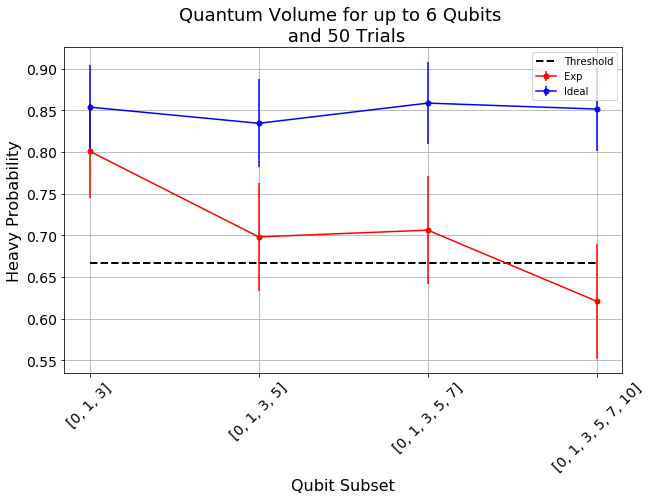

In [26]:
plt.figure(figsize=(10, 6))
ax = plt.gca()

# Plot the essence by calling plot_rb_data
qv_fitter.plot_qv_data(ax=ax, show_plt=False)

# Add title and label
ax.set_title('Quantum Volume for up to %d Qubits \n and %d Trials'%(len(qubit_lists[-1]), ntrials), fontsize=18)

plt.show()

### Step 7: Calculate the Quantum Volume


The quantum volume treats the width and depth of a model circuit with equal importance and measures the largest squareshaped (i.e., $m = d$) model circuit a quantum computer can implement successfully on average. 

The *quantum volume* $V_Q$ is defined as
$$\log_2 V_Q = \arg\max_{m} \min (m, d(m))$$

We list the statistics for each depth. For each depth we list if the depth was successful or not and with what confidence interval. For a depth to be sucessful the confidence interval must be > 97.5%.

In [37]:
qv_success_list = qv_fitter.qv_success()
qv_list = qv_fitter.ydata
QV = 1
for qidx, qubit_list in enumerate(qubit_lists):
    if qv_list[0][qidx]>2/3:
        if qv_success_list[qidx][0]:
            print("Width/depth %d greater than 2/3 (%f) with confidence %f (successful). Quantum volume %d"%
                  (len(qubit_list),qv_list[0][qidx],qv_success_list[qidx][1],qv_fitter.quantum_volume()[qidx]))
            QV = qv_fitter.quantum_volume()[qidx]
        else:
            print("Width/depth %d greater than 2/3 (%f) with confidence %f (unsuccessful)."%
                  (len(qubit_list),qv_list[0][qidx],qv_success_list[qidx][1]))
    else:
        print("Width/depth %d less than 2/3 (unsuccessful)."%len(qubit_list))

Width/depth 3 greater than 2/3 (0.800762) with confidence 0.991199 (successful). Quantum volume 8
Width/depth 4 greater than 2/3 (0.698008) with confidence 0.685343 (unsuccessful).
Width/depth 5 greater than 2/3 (0.706094) with confidence 0.729728 (unsuccessful).
Width/depth 6 less than 2/3 (unsuccessful).


In [36]:
print ("The Quantum Volume is:", QV)

The Quantum Volume is: 8
